Descarga de las imagenes cat vs dog

In [0]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2019-07-04 18:29:08--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.140.128, 2a00:1450:400c:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.140.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   156MB/s    in 0.4s    

2019-07-04 18:29:09 (156 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



Extrayendo las imagenes


In [0]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

Definiendo los directorios de entrenamiento y validacion

In [0]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


Imprimiendo la cantidad de imagenes del dataset de entrenamiento y validacion

In [0]:
print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


Generacion de la ConvNet

In [0]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

W0704 18:29:13.311849 139774971058048 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

Funcion de Perdida ....

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['acc'])

W0704 18:29:14.041079 139774971058048 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## Preprocesamiento de datos

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

BATCH_SIZE = 20
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=BATCH_SIZE,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Entrenamienton sin data augmentation

In [0]:
history_1 = model.fit_generator(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              epochs=100,
                              validation_steps=50,
                              verbose=2)

Epoch 1/100
100/100 - 15s - loss: 0.8141 - acc: 0.5390 - val_loss: 0.6739 - val_acc: 0.5700
Epoch 2/100
100/100 - 11s - loss: 0.6486 - acc: 0.6500 - val_loss: 0.6033 - val_acc: 0.6830
Epoch 3/100
100/100 - 11s - loss: 0.5630 - acc: 0.7165 - val_loss: 0.6249 - val_acc: 0.6740
Epoch 4/100
100/100 - 11s - loss: 0.4832 - acc: 0.7665 - val_loss: 0.5797 - val_acc: 0.7160
Epoch 5/100
100/100 - 11s - loss: 0.3973 - acc: 0.8255 - val_loss: 0.5609 - val_acc: 0.7250
Epoch 6/100
100/100 - 11s - loss: 0.3176 - acc: 0.8685 - val_loss: 0.6334 - val_acc: 0.7180
Epoch 7/100
100/100 - 11s - loss: 0.2148 - acc: 0.9110 - val_loss: 0.6688 - val_acc: 0.7270
Epoch 8/100
100/100 - 11s - loss: 0.1688 - acc: 0.9345 - val_loss: 0.9733 - val_acc: 0.7070
Epoch 9/100
100/100 - 10s - loss: 0.1185 - acc: 0.9535 - val_loss: 1.1915 - val_acc: 0.6890
Epoch 10/100
100/100 - 11s - loss: 0.0878 - acc: 0.9720 - val_loss: 1.1078 - val_acc: 0.7240
Epoch 11/100
100/100 - 11s - loss: 0.0732 - acc: 0.9785 - val_loss: 1.3517 - va

### Evaluacion del modelo


In [0]:
model_loss, model_acc = model.evaluate_generator(generator=validation_generator, 
                         steps= validation_generator.n // BATCH_SIZE,
                         verbose=1)

print('model loss is {} \nmodel acc is {}'.format(model_loss, model_acc))

50/50 [==============================] - 4s 72ms/step - loss: 8.7162 - acc: 0.7050
model loss is 8.716220571994782 
model acc is 0.7049999833106995


### Ploteando el entrenamiento

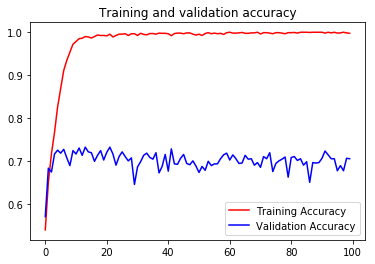

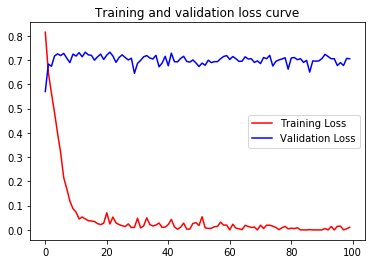

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt
acc = history_1.history['acc']
val_acc = history_1.history['val_acc']
loss = history_1.history['loss']
val_loss = history_1.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss curve')
plt.legend(loc=0)
plt.figure()




plt.show()



## Utilizando Data Augmentation

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
BATCH_SIZE = 20
# All images will be rescaled by 1./255.
train_datagen_aug = ImageDataGenerator( rescale = 1.0/255.,
                                    rotation_range = 40,
                                    width_shift_range = 0.2,
                                    height_shift_range = 0.2,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True,
                                    vertical_flip = True)


# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator_aug = train_datagen_aug.flow_from_directory(train_dir,
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     


Found 2000 images belonging to 2 classes.


In [0]:
history_2 = model.fit_generator(train_generator_aug,
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              epochs=100,
                              validation_steps=50,
                              verbose=2)

Epoch 1/100
100/100 - 23s - loss: 1.4969 - acc: 0.5510 - val_loss: 0.6310 - val_acc: 0.6500
Epoch 2/100
100/100 - 21s - loss: 0.6853 - acc: 0.6125 - val_loss: 0.6449 - val_acc: 0.6740
Epoch 3/100
100/100 - 20s - loss: 0.6704 - acc: 0.6165 - val_loss: 0.5752 - val_acc: 0.6970
Epoch 4/100
100/100 - 20s - loss: 0.6457 - acc: 0.6400 - val_loss: 0.5917 - val_acc: 0.6980
Epoch 5/100
100/100 - 21s - loss: 0.6657 - acc: 0.6540 - val_loss: 0.5854 - val_acc: 0.6780
Epoch 6/100
100/100 - 20s - loss: 0.6341 - acc: 0.6675 - val_loss: 0.5570 - val_acc: 0.7180
Epoch 7/100
100/100 - 21s - loss: 0.6299 - acc: 0.6575 - val_loss: 0.5914 - val_acc: 0.6830
Epoch 8/100
100/100 - 21s - loss: 0.6414 - acc: 0.6430 - val_loss: 0.6131 - val_acc: 0.6650
Epoch 9/100
100/100 - 21s - loss: 0.6470 - acc: 0.6790 - val_loss: 0.5749 - val_acc: 0.6940
Epoch 10/100
100/100 - 20s - loss: 0.6175 - acc: 0.6780 - val_loss: 0.5787 - val_acc: 0.6930
Epoch 11/100
100/100 - 21s - loss: 0.6296 - acc: 0.6565 - val_loss: 0.5688 - va

In [0]:
model_loss, model_acc = model.evaluate_generator(generator=validation_generator, 
                         steps= validation_generator.n // BATCH_SIZE,
                         verbose=1)

print('model loss is {} \nmodel acc is {}'.format(model_loss, model_acc))

50/50 [==============================] - 4s 71ms/step - loss: 0.5488 - acc: 0.7180
model loss is 0.5488300889730453 
model acc is 0.7179999947547913


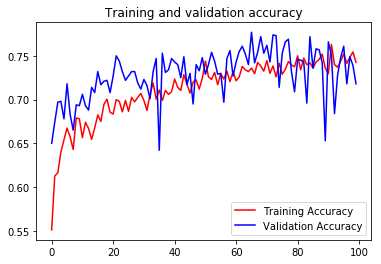

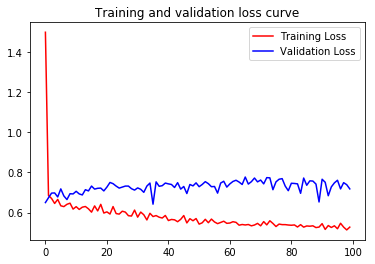

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt
acc = history_2.history['acc']
val_acc = history_2.history['val_acc']
loss = history_2.history['loss']
val_loss = history_2.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss curve')
plt.legend(loc=0)
plt.figure()




plt.show()



In [0]:
print(tf.__version__)

1.14.0
